In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid

2022-12-13 22:57:58.765883: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-13 22:57:59.324082: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-13 22:57:59.324134: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-13 22:57:59.389332: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-13 22:58:00.459209: W tensorflow/stream_executor/platform/de

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test

,game_id,nickname,score,rating
0,2,Super,488,NaN
1,2,BetterBot,401,2000.0
2,7,STEEBot,377,2082.0
3,7,Priya1,379,NaN
4,11,STEEBot,334,1829.0
...,...,...,...,...
44721,72762,kyjo55555,367,NaN
44722,72768,HastyBot,524,2356.0
44723,72768,Maximilian,357,NaN
44724,72769,STEEBot,626,2110.0


In [3]:
train.loc[train["game_id"] == 3].to_numpy()

array([[3, 'davidavid', 440, 1811],
       [3, 'BetterBot', 318, 2071]], dtype=object)

In [4]:
def BotDetector(df):
    
    q = np.array([])
    
    for i in range(1, max(df["game_id"]) + 1):
        if df.loc[df["game_id"] == i].to_numpy().size == 0:
            pass
        else:
            if df.loc[df["game_id"] == i].to_numpy()[0,1] == ('BetterBot' or 'STEEBot' or 'HastyBot'):
                q = np.append(q, [1,0])
            else:
                q = np.append(q, [0,1])
    
    df["bot"] = q.reshape(-1, 1)
    return df

def WinDetector(df):
    
    q = np.array([])
    
    for i in range(1, max(df["game_id"]) + 1):
        if df.loc[df["game_id"] == i].to_numpy().size == 0:
            pass
        else:
            if df.loc[df["game_id"] == i].to_numpy()[0,2] > df.loc[df["game_id"] == i].to_numpy()[1,2]:
                q = np.append(q, [1,0])
            elif df.loc[df["game_id"] == i].to_numpy()[0,2] < df.loc[df["game_id"] == i].to_numpy()[1,2]:
                q = np.append(q, [0,1])
            else:
                q = np.append(q, [0,0])

    df["win"] = q.reshape(-1, 1)
    return df

In [5]:
train = BotDetector(train)
test = BotDetector(test)

In [6]:
train = WinDetector(train)
test = WinDetector(test)

As the old computer science adage goes, "there's probably a faster way to do this."

In [7]:
train

,game_id,nickname,score,rating,bot,win
0,1,BetterBot,335,1637,1.0,0.0
1,1,stevy,429,1500,0.0,1.0
2,3,davidavid,440,1811,0.0,1.0
3,3,BetterBot,318,2071,1.0,0.0
4,4,Inandoutworker,119,1473,0.0,0.0
...,...,...,...,...,...,...
100815,72771,HastyBot,393,1614,1.0,1.0
100816,72772,BetterBot,442,1674,1.0,1.0
100817,72772,Gtowngrad,388,1364,0.0,0.0
100818,72773,adola,383,2075,0.0,1.0


In [8]:
test

,game_id,nickname,score,rating,bot,win
0,2,Super,488,NaN,0.0,1.0
1,2,BetterBot,401,2000.0,1.0,0.0
2,7,STEEBot,377,2082.0,0.0,0.0
3,7,Priya1,379,NaN,1.0,1.0
4,11,STEEBot,334,1829.0,0.0,0.0
...,...,...,...,...,...,...
44721,72762,kyjo55555,367,NaN,0.0,1.0
44722,72768,HastyBot,524,2356.0,0.0,1.0
44723,72768,Maximilian,357,NaN,1.0,0.0
44724,72769,STEEBot,626,2110.0,0.0,1.0


In [9]:
def draw_examples(df):
    
    q = np.array([])
    
    for i in range(1, max(df["game_id"]) + 1):
        if df.loc[df["game_id"] == i].to_numpy().size == 0:
            pass
        else:
            q = np.append(q, df.loc[df["game_id"] == i].to_numpy())
    
    return q

In [10]:
Train_Data = draw_examples(train)
Test_Data = draw_examples(test)

In [11]:
Train_Data

array([1, 'BetterBot', 335, ..., 2302, 1.0, 0.0], dtype=object)

In [12]:
Test_Data

array([2, 'Super', 488, ..., nan, 1.0, 0.0], dtype=object)

In [13]:
Train_Data1 = np.delete(Train_Data.reshape(-1, 2, 6), [0,1], axis = 2)
Test_Data1 = np.delete(Test_Data.reshape(-1, 2, 6), [0,1], axis = 2)

In [14]:
Train_Data1

array([[[335, 1637, 1.0, 0.0],
        [429, 1500, 0.0, 1.0]],

       [[440, 1811, 0.0, 1.0],
        [318, 2071, 1.0, 0.0]],

       [[119, 1473, 0.0, 0.0],
        [478, 1936, 1.0, 1.0]],

       ...,

       [[390, 1500, 0.0, 0.0],
        [393, 1614, 1.0, 1.0]],

       [[442, 1674, 1.0, 1.0],
        [388, 1364, 0.0, 0.0]],

       [[383, 2075, 0.0, 1.0],
        [346, 2302, 1.0, 0.0]]], dtype=object)

In [15]:
Test_Data1

array([[[488, nan, 0.0, 1.0],
        [401, 2000.0, 1.0, 0.0]],

       [[377, 2082.0, 0.0, 0.0],
        [379, nan, 1.0, 1.0]],

       [[334, 1829.0, 0.0, 0.0],
        [462, nan, 1.0, 1.0]],

       ...,

       [[299, 1710.0, 1.0, 0.0],
        [367, nan, 0.0, 1.0]],

       [[524, 2356.0, 0.0, 1.0],
        [357, nan, 1.0, 0.0]],

       [[626, 2110.0, 0.0, 1.0],
        [384, nan, 1.0, 0.0]]], dtype=object)

In [16]:
Train_Data1[:,:,1]

array([[1637, 1500],
       [1811, 2071],
       [1473, 1936],
       ...,
       [1500, 1614],
       [1674, 1364],
       [2075, 2302]], dtype=object)

In [17]:
a = np.array([])

for i in Train_Data1[:,:,1]:
    
    y = np.random.randint(0, 2)
    a = np.append(a, i[y])
    i[y] = 0.0    

In [18]:
Train_Data1

array([[[335, 1637, 1.0, 0.0],
        [429, 0.0, 0.0, 1.0]],

       [[440, 0.0, 0.0, 1.0],
        [318, 2071, 1.0, 0.0]],

       [[119, 1473, 0.0, 0.0],
        [478, 0.0, 1.0, 1.0]],

       ...,

       [[390, 1500, 0.0, 0.0],
        [393, 0.0, 1.0, 1.0]],

       [[442, 1674, 1.0, 1.0],
        [388, 0.0, 0.0, 0.0]],

       [[383, 0.0, 0.0, 1.0],
        [346, 2302, 1.0, 0.0]]], dtype=object)

In [19]:
a

array([1500., 1811., 1936., ..., 1614., 1364., 2075.])

In [20]:
X_Train = Train_Data1
y_Train = a

In [21]:
X_Train

array([[[335, 1637, 1.0, 0.0],
        [429, 0.0, 0.0, 1.0]],

       [[440, 0.0, 0.0, 1.0],
        [318, 2071, 1.0, 0.0]],

       [[119, 1473, 0.0, 0.0],
        [478, 0.0, 1.0, 1.0]],

       ...,

       [[390, 1500, 0.0, 0.0],
        [393, 0.0, 1.0, 1.0]],

       [[442, 1674, 1.0, 1.0],
        [388, 0.0, 0.0, 0.0]],

       [[383, 0.0, 0.0, 1.0],
        [346, 2302, 1.0, 0.0]]], dtype=object)

In [22]:
X_Train = np.asarray(X_Train).astype('float32')
y_Train = np.asarray(y_Train).astype('float32')

In [23]:
model1 = None
model1 = keras.Sequential(
    
    [
        tf.keras.Input(shape = (2,4)),
        Dense(200, activation='relu', name = "L1"), 
        Dense(100, activation='relu', name = "L2"),
        Dense(50, activation = 'relu', name = "L3"),
        Dense(25, activation='relu', name = "L4"),
        Dense(1, activation = 'linear', name = "L5"),
                                ], name = "Model_1")

2022-12-13 23:07:00.884417: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-13 23:07:00.884510: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-13 23:07:00.884568: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-JS1ARDF): /proc/driver/nvidia/version does not exist
2022-12-13 23:07:00.885530: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
model1.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 2, 200)            1000      
                                                                 
 L2 (Dense)                  (None, 2, 100)            20100     
                                                                 
 L3 (Dense)                  (None, 2, 50)             5050      
                                                                 
 L4 (Dense)                  (None, 2, 25)             1275      
                                                                 
 L5 (Dense)                  (None, 2, 1)              26        
                                                                 
Total params: 27,451
Trainable params: 27,451
Non-trainable params: 0
_________________________________________________________________


In [25]:
model1.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-3))

history1 = model1.fit(X_Train, y_Train, batch_size = 1000, epochs = 100)

Epoch 1/100
51/51 [==============================] - 1s 16ms/step - loss: 1283581.5000
Epoch 2/100
51/51 [==============================] - 1s 18ms/step - loss: 145144.7969
Epoch 3/100
51/51 [==============================] - 1s 24ms/step - loss: 138245.1562
Epoch 4/100
51/51 [==============================] - 1s 19ms/step - loss: 137700.7031
Epoch 5/100
51/51 [==============================] - 1s 19ms/step - loss: 137332.8906
Epoch 6/100
51/51 [==============================] - 1s 19ms/step - loss: 136950.6406
Epoch 7/100
51/51 [==============================] - 1s 19ms/step - loss: 136344.4844
Epoch 8/100
51/51 [==============================] - 1s 19ms/step - loss: 135402.4844
Epoch 9/100
51/51 [==============================] - 1s 21ms/step - loss: 134212.0781
Epoch 10/100
51/51 [==============================] - 1s 21ms/step - loss: 132639.8438
Epoch 11/100
51/51 [==============================] - 1s 22ms/step - loss: 130724.1016
Epoch 12/100
51/51 [==============================]

51/51 [==============================] - 1s 15ms/step - loss: 60999.4688
Epoch 97/100
51/51 [==============================] - 1s 16ms/step - loss: 63507.5820
Epoch 98/100
51/51 [==============================] - 1s 16ms/step - loss: 61466.5664
Epoch 99/100
51/51 [==============================] - 1s 16ms/step - loss: 62916.3086
Epoch 100/100
51/51 [==============================] - 1s 16ms/step - loss: 62478.2734


In [26]:
history1.history

{'loss': [1283581.5,
  145144.796875,
  138245.15625,
  137700.703125,
  137332.890625,
  136950.640625,
  136344.484375,
  135402.484375,
  134212.078125,
  132639.84375,
  130724.1015625,
  127772.46875,
  123821.859375,
  118885.3203125,
  112978.078125,
  107550.46875,
  102880.6875,
  99229.40625,
  96420.4453125,
  92893.8203125,
  87966.0703125,
  84493.7109375,
  81341.6875,
  79749.6953125,
  79271.390625,
  77264.0390625,
  77611.8125,
  77730.328125,
  76547.9140625,
  75859.1953125,
  74936.671875,
  75568.984375,
  74687.4296875,
  74692.3828125,
  75062.4765625,
  74559.34375,
  74817.5546875,
  73890.9375,
  73359.796875,
  73417.3125,
  74706.4296875,
  73571.5859375,
  72410.5625,
  72004.09375,
  72007.578125,
  72964.1328125,
  72108.1328125,
  71975.171875,
  71795.015625,
  71277.390625,
  70501.0390625,
  70347.7734375,
  71511.09375,
  70612.15625,
  70273.0390625,
  70859.4765625,
  69280.859375,
  69675.5,
  70883.4921875,
  70319.453125,
  68580.0625,
  69320.

In [27]:
y_Test = model1.predict(np.asarray(Test_Data1).astype('float32'))
y_Test.reshape(-1,1)

699/699 [==============================] - 1s 2ms/step


array([[      nan],
       [1958.9197],
       [1957.1196],
       ...,
       [      nan],
       [2119.6396],
       [      nan]], dtype=float32)

In [28]:
test["prediction"] = y_Test.reshape(-1, 1)
prediction = pd.DataFrame((test["game_id"], test["prediction"])).transpose()
prediction

,game_id,prediction
0,2.0,NaN
1,2.0,1958.919678
2,7.0,1957.119629
3,7.0,NaN
4,11.0,1850.314453
...,...,...
44721,72762.0,NaN
44722,72768.0,2057.951172
44723,72768.0,NaN
44724,72769.0,2119.639648


In [29]:
prediction2 = prediction[prediction["prediction"].notnull()]
prediction2

,game_id,prediction
1,2.0,1958.919678
2,7.0,1957.119629
4,11.0,1850.314453
6,14.0,1882.997559
9,27.0,2073.539551
...,...,...
44716,72760.0,1947.651978
44719,72761.0,1938.278320
44720,72762.0,1799.601807
44722,72768.0,2057.951172


In [32]:
f = open('predictions.csv', 'x')
prediction2.to_csv('predictions.csv', index=False)

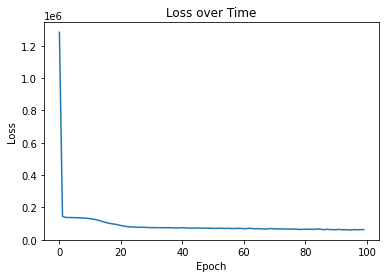

In [38]:
plt.plot(range(100), history1.history["loss"])
plt.title("Loss over Time")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()